# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Mengetahui pergerakan fluktuasi kurs bisa menjadi salah satu tools analisa dari pergerakan harga barang, terutama untuk barang barang komoditas. Dari data ini kita bisa tahu penyebab kenapa harga material saat ini menjadi lebih mahal/ murah dari sebelumnya. Selain itu dalam hal budgeting, dari trend yang kita dapat, kita bisa memperkirakan berapa harga yang tepat saat ini, dari data pembelian/ data sebelumnya. Harapannya saat project berjalan tidak terjadi simpangan yang terlalu besar dari harga budget (Budget aman).

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [4]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [5]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>USD to IDR exchange rate history</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n<base href="http'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [6]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   USD to IDR exchange rate history
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell.

**Note by AN:**

Dari hasil scrapt HTML halaman web tadi (utuh), kita cari mana yang menunjukkan informasi yang ingin kita ambil (tabel historical kurs), dengan cara:
1. Buka HTML dari halaman (tombol F12)
2. Ambil 'tag' yang menunjukkan lokasi tabel secara keseluruhan, kita gunakan `find` dan hasilnya simpan sebagai variabel (hasilnya masih berupa text)
3. Dari variabel tadi, cari 'key' yang menunjukan informasi spesifik yang kita cari ('hari', 'kurs'), kita gunakan `find_all` (hasil array data)
4. Dari point '3' nantinya kita bisa dapatkan jumlah karakter yang kita gunakan sebagai acuan dalam proses 'looping'

In [7]:
table = soup.find('table', attrs={'class':'history-rates-data'})
print(table.prettify()[1:500])

table border="0" cellpadding="0" cellspacing="0" class="history-rates-data">
 <thead>
  <tr>
   <th class="ltr-bidi-fix">
    Date
   </th>
   <th class="ltr-bidi-fix">
    US Dollar to Indonesian Rupiah
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    <a class="w" href="/exchange-rate-history/usd-idr-2023-12-15">
     December 15, 2023
    </a>
    <a class="n" href="/exchange-rate-history/usd-idr-2023-12-15">
     2023-12-15
    </a>
   </td>
   <td>
    <span class="w">
     <span clas


Finding row length.

In [8]:
#ambil Date
table.find_all('a', attrs={'class' : 'w'})[:5]

[<a class="w" href="/exchange-rate-history/usd-idr-2023-12-15">December 15, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-12-14">December 14, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-12-13">December 13, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-12-12">December 12, 2023</a>,
 <a class="w" href="/exchange-rate-history/usd-idr-2023-12-11">December 11, 2023</a>]

In [9]:
#cek Date
table.find_all('a', attrs={'class' : 'w'})[0].text

'December 15, 2023'

In [10]:
#ambil US dollar to IDR
table.find_all('span', attrs={'class' : 'w'})[:5]

[<span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,529</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,476</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,360</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,576</span></span>,
 <span class="w"><span class="nowrap"><span class="currencySymbol">$</span>1 =</span> <span class="nowrap"><span class="currencySymbol">Rp</span>15,653</span></span>]

In [11]:
#cek US dolar to IDR
table.find_all('span', attrs={'class' : 'w'})[0].text

'$1 = Rp15,529'

In [12]:
# cari jumlah baris agar dinamis sesuai data source-nya
row = table.find_all('a', attrs={'class' : 'w'})
row_length = len(row)
row_length

130

Do the scrapping process here

**Note by AN:**

Setelah kita mendapatkan pola/ kunci yang bisa kita gunakan untuk mengambil data yang kita butuhkan (hari dan kurs), langkah selanjutnya adalah mengambil semua data yang ada di semua baris dengan cara looping

In [13]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #get period
    period = table.find_all('a', attrs={'class' : 'w'})[i].text
    period = period.strip()

    #get nominal USD to IDR
    kurs_usd = table.find_all('span', attrs={'class' : 'w'})[i].text
    kurs_usd = kurs_usd.strip()

    temp.append((period, kurs_usd))
    
temp 

[('December 15, 2023', '$1 = Rp15,529'),
 ('December 14, 2023', '$1 = Rp15,476'),
 ('December 13, 2023', '$1 = Rp15,360'),
 ('December 12, 2023', '$1 = Rp15,576'),
 ('December 11, 2023', '$1 = Rp15,653'),
 ('December 8, 2023', '$1 = Rp15,573'),
 ('December 7, 2023', '$1 = Rp15,507'),
 ('December 6, 2023', '$1 = Rp15,514'),
 ('December 5, 2023', '$1 = Rp15,463'),
 ('December 4, 2023', '$1 = Rp15,485'),
 ('December 1, 2023', '$1 = Rp15,413'),
 ('November 30, 2023', '$1 = Rp15,559'),
 ('November 29, 2023', '$1 = Rp15,459'),
 ('November 28, 2023', '$1 = Rp15,352'),
 ('November 27, 2023', '$1 = Rp15,505'),
 ('November 24, 2023', '$1 = Rp15,540'),
 ('November 23, 2023', '$1 = Rp15,633'),
 ('November 22, 2023', '$1 = Rp15,656'),
 ('November 21, 2023', '$1 = Rp15,517'),
 ('November 20, 2023', '$1 = Rp15,389'),
 ('November 17, 2023', '$1 = Rp15,424'),
 ('November 16, 2023', '$1 = Rp15,484'),
 ('November 15, 2023', '$1 = Rp15,519'),
 ('November 14, 2023', '$1 = Rp15,459'),
 ('November 13, 2023',

In [14]:
# balik urutan
temp = temp[::-1]
temp

[('June 19, 2023', '$1 = Rp15,014'),
 ('June 20, 2023', '$1 = Rp15,015'),
 ('June 21, 2023', '$1 = Rp14,945'),
 ('June 22, 2023', '$1 = Rp14,939'),
 ('June 23, 2023', '$1 = Rp15,045'),
 ('June 26, 2023', '$1 = Rp15,045'),
 ('June 27, 2023', '$1 = Rp14,988'),
 ('June 28, 2023', '$1 = Rp14,985'),
 ('June 29, 2023', '$1 = Rp15,059'),
 ('June 30, 2023', '$1 = Rp15,040'),
 ('July 3, 2023', '$1 = Rp15,063'),
 ('July 4, 2023', '$1 = Rp15,020'),
 ('July 5, 2023', '$1 = Rp15,078'),
 ('July 6, 2023', '$1 = Rp15,178'),
 ('July 7, 2023', '$1 = Rp15,162'),
 ('July 10, 2023', '$1 = Rp15,187'),
 ('July 11, 2023', '$1 = Rp15,140'),
 ('July 12, 2023', '$1 = Rp14,935'),
 ('July 13, 2023', '$1 = Rp14,954'),
 ('July 14, 2023', '$1 = Rp15,003'),
 ('July 17, 2023', '$1 = Rp14,972'),
 ('July 18, 2023', '$1 = Rp14,989'),
 ('July 19, 2023', '$1 = Rp15,009'),
 ('July 20, 2023', '$1 = Rp15,056'),
 ('July 21, 2023', '$1 = Rp15,043'),
 ('July 24, 2023', '$1 = Rp15,022'),
 ('July 25, 2023', '$1 = Rp15,027'),
 ('Jul

## Creating data frame & Data wrangling

Put the array into dataframe

In [15]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('period','kurs_usd'))
df.head()

,period,kurs_usd
0,"June 19, 2023","$1 = Rp15,014"
1,"June 20, 2023","$1 = Rp15,015"
2,"June 21, 2023","$1 = Rp14,945"
3,"June 22, 2023","$1 = Rp14,939"
4,"June 23, 2023","$1 = Rp15,045"


In [24]:
# cek dtypes
df.dtypes

period      object
kurs_usd    object
dtype: object

Do the data cleaning here

**Penjelasan step-step:**

Setelah mendapatkan dataframe dari web berupa 2 kolom tanggal dan kurs usd, yang kita lakukan selanjutnya adalah:
1. Meng-copy data frame baru (`df_1`) agar data ori masih tersimpan (bisa digunakan kembali sewaktu waktu)
2. Memastikan type data-nya benar. Date -> `datetime`, kurs -> `float64`
3. Namun karena untuk kolom `kurs_usd` isi datanya masih campuran antara text dan nominal, data harus di'bersihkan' dulu dengan membuang text dan ','
4. Setelah data dirasa cukup rapi bisa dilanjut ke tahap visualisasi data

In [42]:
# next step
# 1. ubah period ke date time
df_1 = df.copy()
df_1['period'] = df_1['period'].astype('datetime64[ns]')
# df_1.info()
# 2. ambil nominal di kurs, ubah type data ke numerik
df_1['kurs_usd'] = df_1['kurs_usd'].replace('\$1 = Rp','',regex=True).replace(',','',regex=True)
df_1['kurs_usd'] = df_1['kurs_usd'].astype('float64')
df_1


,period,kurs_usd
0,2023-06-19,15014.0
1,2023-06-20,15015.0
2,2023-06-21,14945.0
3,2023-06-22,14939.0
4,2023-06-23,15045.0
...,...,...
125,2023-12-11,15653.0
126,2023-12-12,15576.0
127,2023-12-13,15360.0
128,2023-12-14,15476.0


Data visualisation

**Note by AN**

- Untuk melihat trend pergerakan selama 6 bulan terakhir -> line plot

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [43]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [44]:
plt.style.use('ggplot')

<Axes: title={'center': 'USD to IDR'}, xlabel='month', ylabel='IDR'>

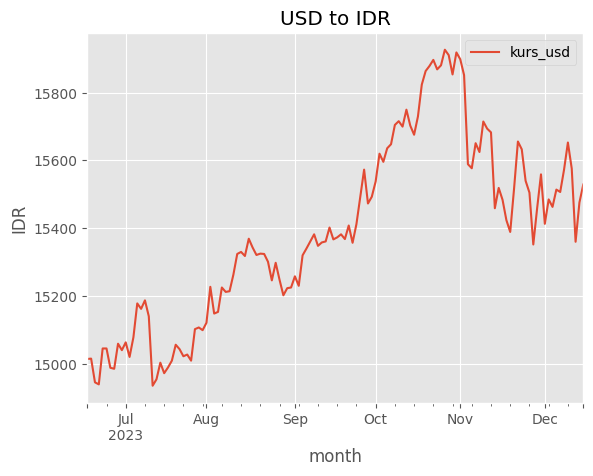

In [45]:
df_1 = df_1.set_index('period')
df_1.plot(
    title= 'USD to IDR',
    xlabel= 'month',
    ylabel= 'IDR'
)

In [46]:
# Informasi umum
df_1.describe()

,kurs_usd
count,130.000000
mean,15387.861538
std,269.553629
min,14935.000000
25%,15180.250000
50%,15367.500000
75%,15576.750000
max,15927.000000


In [47]:
# Kondisi di 5 hari terakhir
df_1.tail(5)

,kurs_usd
period,
2023-12-11,15653.0
2023-12-12,15576.0
2023-12-13,15360.0
2023-12-14,15476.0
2023-12-15,15529.0


In [58]:
# Kapan kurs tertinggi
df_1.sort_values(by='kurs_usd', ascending=False).head(5)

,kurs_usd
period,
2023-10-26,15927.0
2023-10-31,15919.0
2023-10-27,15911.0
2023-11-01,15899.0
2023-10-23,15897.0


In [54]:
# Simpan file
df_1.to_pickle('reference/kurs_usd_6month') # format python
df_1.to_csv('reference/kurs_usd_6month.csv') # format csv


### Analysis and Conclusion

- Dilihat dari bulan Juli 2023, nilai Rupiah menunjukkan penurunan (melemah) terhadap nilai USD.
- Puncaknya ada di tanggal 26 Oktober dimana rupiah menyentuh angka Rp. 15.927 per USD-nya.
- Namun dari bulan Novemer Rupiah kembali menguat. Di hari Jumat, 15 Des 2023, kurs Rupiah ditutup pada angka Rp 15.529 per USD-nya.
- Nilai mean di 6 bulan terakhir (Jul - Des 23) adalah Rp. 15.388 per USD

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.